In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tf.random.set_seed(0)

In [10]:
#import the dataset
bigfive_df = pd.read_csv('./dataset/datasetbigfive.csv')

In [11]:
bigfive_df.shape

(709, 8)

In [12]:
bigfive_df.head(10)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
5,Male,18,5,7,7,6,4,lively
6,Female,17,5,6,5,7,4,extraverted
7,Female,19,6,6,7,5,4,extraverted
8,Male,18,5,7,5,6,7,dependable
9,Female,19,5,5,7,4,5,lively


Data Cleaning

Eliminate missing value in dataset

In [13]:
#Check and remove the row with missing value
bigfive_df.isnull().values
bigfive_df.dropna(inplace=True)
print('Number of rows after eliminating missing values: ', len(bigfive_df))

Number of rows after eliminating missing values:  709


Data Encoding 

Using Label Encoder - To transform the label into numeric form

In [14]:
#tansform the personality column into 0(dependable), 1(extraverted), 2(lively), 3(responsible), 4(serious)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()

bigfive_df['Personality'] = labelencoder_X_1.fit_transform(bigfive_df['Personality'])
bigfive_df.head(10)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,1
1,Male,19,4,5,4,6,6,4
2,Female,18,7,6,4,5,5,0
3,Female,22,5,6,7,4,3,1
4,Female,19,7,4,6,5,4,2
5,Male,18,5,7,7,6,4,2
6,Female,17,5,6,5,7,4,1
7,Female,19,6,6,7,5,4,1
8,Male,18,5,7,5,6,7,0
9,Female,19,5,5,7,4,5,2


Data Normalization 

Normalization using MixMaxScaler

In [15]:
#drop the column gender and age
data = bigfive_df.drop(labels=['Gender', 'Age'], axis=1).values


In [16]:
#shuffle the dataset 
data = shuffle(data, random_state=42) 
data

array([[3, 5, 2, 5, 2, 3],
       [5, 6, 5, 6, 1, 0],
       [6, 5, 4, 5, 3, 2],
       ...,
       [6, 1, 6, 4, 6, 4],
       [6, 6, 7, 6, 5, 1],
       [7, 5, 6, 7, 3, 0]], dtype=int64)

In [17]:
#To check the maximum and minimum value in dataset for reference in prediction analysis
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler.fit(data))
print("Max: ", scaler.data_max_)
print("Min: ", scaler.data_min_)
print("Max - Min: ",scaler.data_range_)
print(scaler.scale_)

MinMaxScaler()
Max:  [8. 8. 8. 8. 7. 4.]
Min:  [1. 1. 1. 1. 1. 0.]
Max - Min:  [7. 7. 7. 7. 6. 4.]
[0.14285714 0.14285714 0.14285714 0.14285714 0.16666667 0.25      ]


In [18]:
#Use MinMaxScaler() function to normalize the dataset
data = scaler.fit_transform(data)
print("Number of column transform: ", scaler.n_features_in_)


Number of column transform:  6


Select the features (input) and target (output) 

X - features (openness, neuroticism, conscientiousness, agreeableness, extraversion)

Y - target (Personality)

In [19]:
# extract the features and target
X = data[:, 0:5]
Y = data[:, 5]

Dataset Split

In [20]:
#split dataset to 70% training, 15% testing & validation

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=0)

In [21]:
#check the shape for each split

print("X train: ",X_train.shape, "X test: ", X_test.shape)
print("Y train: ",Y_train.shape, "Y test: ",Y_test.shape,)
print("X validation: ", X_val.shape, "Y validation: ", Y_val.shape)

X train:  (496, 5) X test:  (107, 5)
Y train:  (496,) Y test:  (107,)
X validation:  (106, 5) Y validation:  (106,)


In [22]:
# count the number of classes
print(np.unique(Y_train))
# [0 1]

[0.   0.25 0.5  0.75 1.  ]


Build the ANN model

In [23]:
#Define the layers of ANN model with num of neurons and activation function
personality_ann_model = Sequential([
    Dense(units=16, activation='relu', input_shape=(X.shape[1], )), #input layer
    Dense(units=32, activation='relu'),  #hidden layer
    Dense(units=1, activation='sigmoid')  #output layer
])

personality_ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model while defining the optimizer and learning rate
from keras.optimizers import adam_v2

optimizer = adam_v2.Adam(learning_rate=0.01)
personality_ann_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [25]:
#fit the model using 1000 epoch and 256 batch size. Set the validation into 0 since the validation data already defined. 
hist_adam = personality_ann_model.fit(x=X_train, y=Y_train, batch_size=256, epochs=1000, validation_data=(X_val, Y_val), validation_split=0)

Epoch 1/1000
2/2 [==============================] - 2s 205ms/step - loss: 0.1268 - accuracy: 0.1855 - val_loss: 0.1445 - val_accuracy: 0.2547
Epoch 2/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.1256 - accuracy: 0.2137 - val_loss: 0.1441 - val_accuracy: 0.2264
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.1250 - accuracy: 0.2218 - val_loss: 0.1435 - val_accuracy: 0.2358
Epoch 4/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.1248 - accuracy: 0.1976 - val_loss: 0.1434 - val_accuracy: 0.2547
Epoch 5/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1248 - accuracy: 0.1956 - val_loss: 0.1433 - val_accuracy: 0.2642
Epoch 6/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1243 - accuracy: 0.2198 - val_loss: 0.1432 - val_accuracy: 0.2642
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1242 - accuracy: 0.2016 - val_loss: 0.1431 - val_accuracy: 0.2925
Epoch 8/1000

Result and Accuracy

In [26]:
#training loss accuracy
test_loss, test_acc = personality_ann_model.evaluate(X_train, Y_train)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

16/16 [==============================] - 0s 942us/step - loss: 0.0459 - accuracy: 0.3750
Evaluation result on Test Data : Loss = 0.045877549797296524, accuracy = 0.375


In [27]:
#validation loss accuracy
test_loss, test_acc = personality_ann_model.evaluate(X_val, Y_val)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.2736
Evaluation result on Test Data : Loss = 0.1792362928390503, accuracy = 0.27358490228652954


Model loss accuracy graph

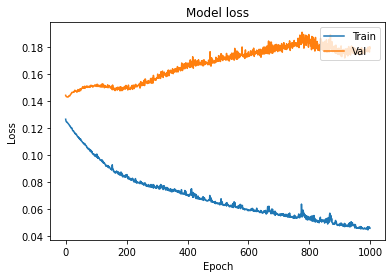

In [28]:
#plot the visualize the training loss and the validation loss

plt.plot(hist_adam.history['loss'])
plt.plot(hist_adam.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Model Training accuracy graph

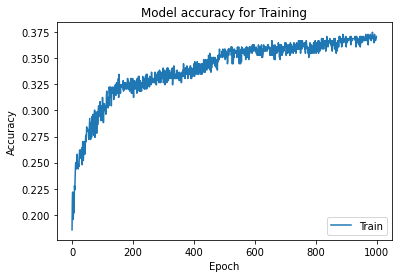

In [29]:
#plot the  training accuracy and validation accuracy

plt.plot(hist_adam.history['accuracy'])
plt.title('Model accuracy for Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Compare the acccuracy of training and validation

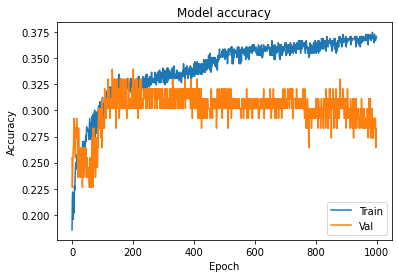

In [30]:
#plot the  training accuracy and validation accuracy

plt.plot(hist_adam.history['accuracy'])
plt.plot(hist_adam.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Prediction using ANN model

In [31]:
#predict the test data into model
import numpy

y_predict = personality_ann_model.predict(X_test)
y_output = [numpy.round(x, 2) for x in y_predict]


In [32]:
Y_test = np.array(Y_test)
Y_testr = Y_test[:, np.newaxis]

In [33]:
h_array = np.hstack((X_test, Y_testr))

In [34]:
#denormalize the input data using inverse transform function
input_data = scaler.inverse_transform(h_array)

In [35]:
print("Input Data with result of prediction by rows")
for i in range(len(y_predict)):
    print(input_data[i], "Prediction: ", y_predict[i])

Input Data with result of prediction by rows
[6. 3. 7. 4. 4. 0.] Prediction:  [0.6875864]
[6. 6. 5. 4. 4. 0.] Prediction:  [0.31088018]
[6. 2. 6. 7. 3. 2.] Prediction:  [0.06166872]
[6. 3. 5. 5. 7. 1.] Prediction:  [0.49229738]
[6. 6. 4. 5. 2. 3.] Prediction:  [0.6435441]
[6. 1. 6. 4. 6. 4.] Prediction:  [0.07482913]
[4. 4. 6. 5. 2. 4.] Prediction:  [0.89805293]
[2. 4. 4. 3. 5. 4.] Prediction:  [0.53984857]
[4. 3. 7. 6. 5. 2.] Prediction:  [0.78141]
[6. 5. 4. 5. 5. 4.] Prediction:  [0.62672794]
[4. 4. 4. 4. 4. 4.] Prediction:  [0.44583032]
[5. 5. 5. 1. 4. 0.] Prediction:  [0.04102311]
[3. 4. 7. 6. 4. 2.] Prediction:  [0.81371486]
[6. 6. 6. 6. 4. 0.] Prediction:  [0.27074224]
[6. 6. 6. 6. 6. 4.] Prediction:  [0.5964119]
[5. 1. 3. 5. 2. 2.] Prediction:  [0.59834355]
[7. 4. 5. 5. 5. 0.] Prediction:  [0.3195321]
[7. 7. 2. 6. 5. 4.] Prediction:  [0.96167827]
[6. 1. 5. 4. 5. 4.] Prediction:  [0.41621274]
[5. 7. 6. 7. 6. 0.] Prediction:  [0.42183095]
[7. 8. 5. 4. 7. 2.] Prediction:  [0.727519

In [36]:
#horizontal stack combine the input data array with prediction resultarray  into same array
data_result = np.hstack((input_data, y_predict))
data_result = np.array(data_result)

In [37]:
#import result into csv file format
import csv

header = ['Test_openness', 'Test_neuroticism', 'Test_conscientiousness', 'Test_agreeableness', 'Test_extraversion', 'Result_personality', 'Test_personality']

# open the file in the write mode

with open('./prediction/ANN_predictionResult.csv', 'w', encoding='UTF8', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    
    # write the header
    writer.writerow(header)
    
    # write the data
    writer.writerows(data_result)

# close the file
file.close()

End 

Prediction analysis in CSV file